In [0]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [0]:
train = pd.read_csv('TrainingData.csv')
test = pd.read_csv('TestingData.csv')

In [4]:
train[train['label'] == 0].head(10)

,id,tweet,label
5,2.641690e+17,Im bringing the monster load of candy tomorrow...,0
6,2.631920e+17,"Apple software, retail chiefs out in overhaul:...",0
8,2.602000e+17,#Livewire Nadal confirmed for Mexican Open in ...,0
10,2.506930e+17,@Alyoup005 @addicted2haley hmmmm November is ...,0
11,2.633050e+17,#Iran US delisting MKO from global terrorists ...,0
13,2.639750e+17,Expect light-moderate rains over E. Visayas; C...,0
17,2.642240e+17,@TrevorJavier the heat game may cost alot more...,0
22,2.642400e+17,BLACK FRIDAY Huge Saving Aerial View of a City...,0
25,2.366650e+17,"Mohamed Morsi, Egypt's Muslim Brotherhood pres...",0
26,2.623840e+17,C'mon Avila! You just got tagged out by a guy ...,0


In [5]:
train[train['label'] == 1].head(10)

,id,tweet,label
0,2.641840e+17,Gas by my house hit $3.39!!!! I'm going to Cha...,1
2,2.641060e+17,with J Davlar 11th. Main rivals are team Polan...,1
7,2.633990e+17,@oluoch @victor_otti @kunjand I just watched i...,1
9,2.640880e+17,@MsSheLahY I didnt want to just pop up... but ...,1
12,2.639570e+17,Good Morning Becky ! Thursday is going to be F...,1
14,2.573440e+17,One ticket left for the @49ers game tomorrow! ...,1
18,2.640420e+17,Never start working on your dreams and goals t...,1
19,2.641020e+17,"@TheFFAddict I had Vick and Flacco, needed an ...",1
20,2.640720e+17,Looks like Andy the Android may have had a lit...,1
21,2.621150e+17,@APGPhoto oooh nice .. Tis tempting to go up t...,1


In [6]:
train[train['label'] == -1].head(10)

,id,tweet,label
1,2.642490e+17,Iranian general says Israel's Iron Dome can't ...,-1
3,2.640950e+17,"Talking about ACT's && SAT's, deciding where I...",-1
4,2.549420e+17,"They may have a SuperBowl in Dallas, but Dalla...",-1
15,2.641260e+17,AFC away fans on Saturday. All this stuff abou...,-1
16,2.642600e+17,Why is it so hard to find the @TVGuideMagazine...,-1
23,2.579510e+17,@MelmurMel @PBandJenelley_1 @vl_delp_ham_ Jene...,-1
24,2.635030e+17,@MyBeautyisBrown LMFAO his big ass get on my n...,-1
27,2.639370e+17,@thehuwdavies you think the Boro will beat Swa...,-1
32,2.638010e+17,My teachers call themselves givng us candy.......,-1
39,1.650440e+17,Homegrown talent missing on Signing Day: Throu...,-1


In [7]:
train.shape

(7589, 3)

In [8]:
test.shape

(1317, 3)

### Check label-distribution

In [9]:
train['label'].value_counts()

 0    3691
 1    2834
-1    1064
Name: label, dtype: int64

#### The distribution of length of tweets in terms of words

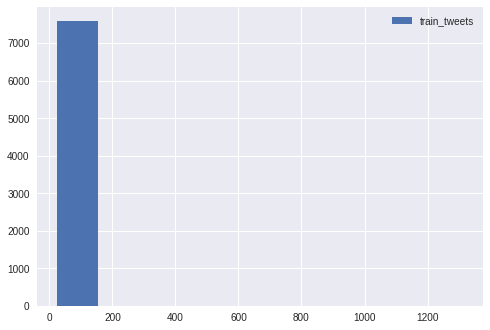

In [10]:
len_train = train['tweet'].str.len()

plt.hist(len_train, bins = 10, label='train_tweets')
plt.legend()
plt.show()

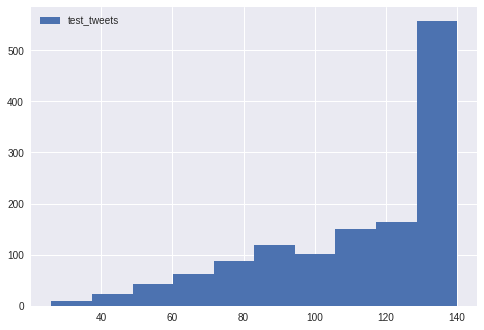

In [11]:
len_test = test['tweet'].str.len()

plt.hist(len_test, bins = 10, label='test_tweets')
plt.legend()
plt.show()

# Data Cleaning

In [12]:
Combine = train.append(test, ignore_index=True)
Combine.shape

(8906, 3)

### Remove unwanted text patterns from tweets

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

### Removing tweeter handles

#### "@[]* it is a regular expression. This will pick any word starting with @"

In [14]:
Combine['tweets'] = np.vectorize(remove_pattern)(Combine['tweet'], '@[\w]*')
Combine.head(10)

,id,tweet,label,tweets
0,2.641840e+17,Gas by my house hit $3.39!!!! I'm going to Cha...,1,Gas by my house hit $3.39!!!! I'm going to Cha...
1,2.642490e+17,Iranian general says Israel's Iron Dome can't ...,-1,Iranian general says Israel's Iron Dome can't ...
2,2.641060e+17,with J Davlar 11th. Main rivals are team Polan...,1,with J Davlar 11th. Main rivals are team Polan...
3,2.640950e+17,"Talking about ACT's && SAT's, deciding where I...",-1,"Talking about ACT's && SAT's, deciding where I..."
4,2.549420e+17,"They may have a SuperBowl in Dallas, but Dalla...",-1,"They may have a SuperBowl in Dallas, but Dalla..."
5,2.641690e+17,Im bringing the monster load of candy tomorrow...,0,Im bringing the monster load of candy tomorrow...
6,2.631920e+17,"Apple software, retail chiefs out in overhaul:...",0,"Apple software, retail chiefs out in overhaul:..."
7,2.633990e+17,@oluoch @victor_otti @kunjand I just watched i...,1,I just watched it! Sridevi's comeback.... U...
8,2.602000e+17,#Livewire Nadal confirmed for Mexican Open in ...,0,#Livewire Nadal confirmed for Mexican Open in ...
9,2.640880e+17,@MsSheLahY I didnt want to just pop up... but ...,1,I didnt want to just pop up... but yep we hav...


### Removing punctuation, numbers and special characters

#### This will replace everything except characters and hashtags with spaces. "[^a-zA-Z#]" this regular expression means everything except alphabets and hashtags.

In [15]:
Combine['tweets'] = Combine['tweets'].str.replace("[^a-zA-Z#]", " ")
Combine.head(10)

,id,tweet,label,tweets
0,2.641840e+17,Gas by my house hit $3.39!!!! I'm going to Cha...,1,Gas by my house hit I m going to Cha...
1,2.642490e+17,Iranian general says Israel's Iron Dome can't ...,-1,Iranian general says Israel s Iron Dome can t ...
2,2.641060e+17,with J Davlar 11th. Main rivals are team Polan...,1,with J Davlar th Main rivals are team Polan...
3,2.640950e+17,"Talking about ACT's && SAT's, deciding where I...",-1,Talking about ACT s SAT s deciding where I...
4,2.549420e+17,"They may have a SuperBowl in Dallas, but Dalla...",-1,They may have a SuperBowl in Dallas but Dalla...
5,2.641690e+17,Im bringing the monster load of candy tomorrow...,0,Im bringing the monster load of candy tomorrow...
6,2.631920e+17,"Apple software, retail chiefs out in overhaul:...",0,Apple software retail chiefs out in overhaul ...
7,2.633990e+17,@oluoch @victor_otti @kunjand I just watched i...,1,I just watched it Sridevi s comeback U...
8,2.602000e+17,#Livewire Nadal confirmed for Mexican Open in ...,0,#Livewire Nadal confirmed for Mexican Open in ...
9,2.640880e+17,@MsSheLahY I didnt want to just pop up... but ...,1,I didnt want to just pop up but yep we hav...


### Remove short words

#### We remove those words which are of little or no use. So, we will select the length of words which we want to remove

In [16]:
Combine['tweets'] = Combine['tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
Combine.head(10)

,id,tweet,label,tweets
0,2.641840e+17,Gas by my house hit $3.39!!!! I'm going to Cha...,1,house going Chapel Hill
1,2.642490e+17,Iranian general says Israel's Iron Dome can't ...,-1,Iranian general says Israel Iron Dome deal wit...
2,2.641060e+17,with J Davlar 11th. Main rivals are team Polan...,1,with Davlar Main rivals team Poland Hopefully ...
3,2.640950e+17,"Talking about ACT's && SAT's, deciding where I...",-1,Talking about deciding where want college appl...
4,2.549420e+17,"They may have a SuperBowl in Dallas, but Dalla...",-1,They have SuperBowl Dallas Dallas winning Supe...
5,2.641690e+17,Im bringing the monster load of candy tomorrow...,0,bringing monster load candy tomorrow just hope...
6,2.631920e+17,"Apple software, retail chiefs out in overhaul:...",0,Apple software retail chiefs overhaul FRANCISC...
7,2.633990e+17,@oluoch @victor_otti @kunjand I just watched i...,1,just watched Sridevi comeback remember from mo...
8,2.602000e+17,#Livewire Nadal confirmed for Mexican Open in ...,0,#Livewire Nadal confirmed Mexican Open Februar...
9,2.640880e+17,@MsSheLahY I didnt want to just pop up... but ...,1,didnt want just have chapel hill next wednesda...


### Text Normalization

#### 1.) We will tokenize the tweets which means we split the tweets or string of text into tokens(individual words or terms)

In [17]:
Tokenize_tweet = Combine['tweets'].apply(lambda x: x.split())
Tokenize_tweet.head(10)

0                         [house, going, Chapel, Hill]
1    [Iranian, general, says, Israel, Iron, Dome, d...
2    [with, Davlar, Main, rivals, team, Poland, Hop...
3    [Talking, about, deciding, where, want, colleg...
4    [They, have, SuperBowl, Dallas, Dallas, winnin...
5    [bringing, monster, load, candy, tomorrow, jus...
6    [Apple, software, retail, chiefs, overhaul, FR...
7    [just, watched, Sridevi, comeback, remember, f...
8    [#Livewire, Nadal, confirmed, Mexican, Open, F...
9    [didnt, want, just, have, chapel, hill, next, ...
Name: tweets, dtype: object

#### 2.) For normalization,  we will use nltk's PorterStemmer() function

In [0]:
from nltk.stem.porter import *

stemmer = PorterStemmer()
Tokenize_tweet = Tokenize_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

#### We need to combine the tokens. 

In [0]:
#nltk’s MosesDetokenizer function

for i in range(len(Tokenize_tweet)):
    Tokenize_tweet[i] = ' '.join(Tokenize_tweet[i])
    
Combine['tweets'] = Tokenize_tweet

In [20]:
Combine.head(10)

,id,tweet,label,tweets
0,2.641840e+17,Gas by my house hit $3.39!!!! I'm going to Cha...,1,hous go chapel hill
1,2.642490e+17,Iranian general says Israel's Iron Dome can't ...,-1,iranian gener say israel iron dome deal with t...
2,2.641060e+17,with J Davlar 11th. Main rivals are team Polan...,1,with davlar main rival team poland hope make s...
3,2.640950e+17,"Talking about ACT's && SAT's, deciding where I...",-1,talk about decid where want colleg appli colle...
4,2.549420e+17,"They may have a SuperBowl in Dallas, but Dalla...",-1,they have superbowl dalla dalla win superbowl ...
5,2.641690e+17,Im bringing the monster load of candy tomorrow...,0,bring monster load candi tomorrow just hope do...
6,2.631920e+17,"Apple software, retail chiefs out in overhaul:...",0,appl softwar retail chief overhaul francisco a...
7,2.633990e+17,@oluoch @victor_otti @kunjand I just watched i...,1,just watch sridevi comeback rememb from morn
8,2.602000e+17,#Livewire Nadal confirmed for Mexican Open in ...,0,#livewir nadal confirm mexican open februari r...
9,2.640880e+17,@MsSheLahY I didnt want to just pop up... but ...,1,didnt want just have chapel hill next wednesda...


# Data Exploration

### Let's form a WordCloud
#### A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes

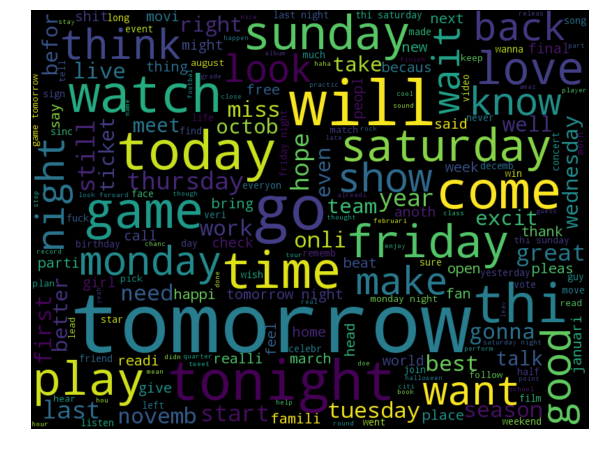

In [21]:
all_words = ' '.join([text for text in Combine['tweets']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(all_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Normal tweets

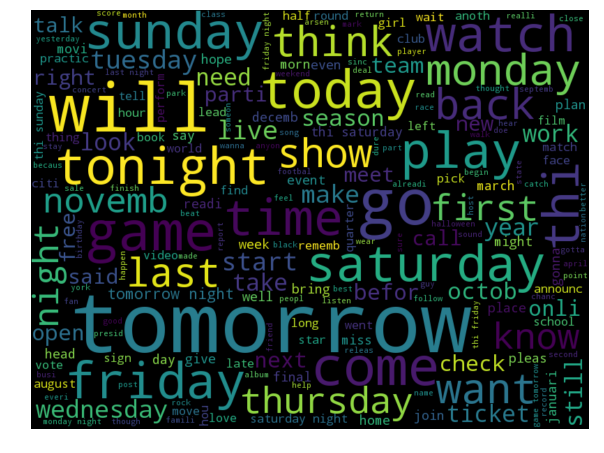

In [22]:
norm_words = ' '.join([text for text in Combine['tweets'][Combine['label'] == 0]])

wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(norm_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative tweets

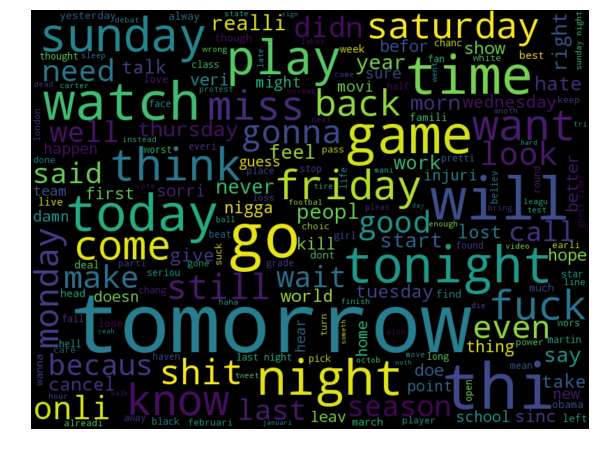

In [23]:
neg_words = ' '.join([text for text in Combine['tweets'][Combine['label'] == -1]])

wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(neg_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Positive Words

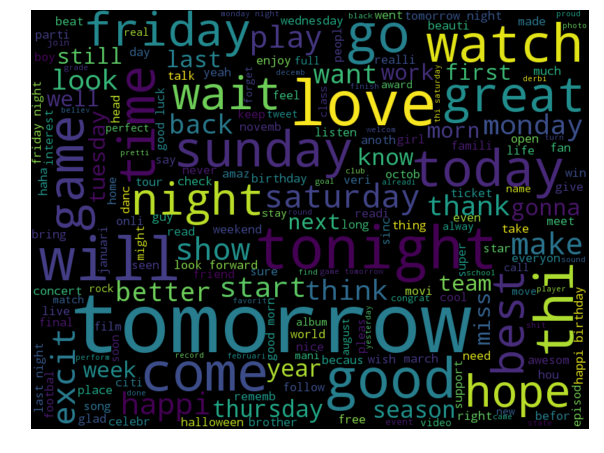

In [24]:
pos_words = ' '.join([text for text in Combine['tweets'][Combine['label'] == 1]])

wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(pos_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Impact of hashtags on tweet sentiments

#### Hashtags in twitter helps us in distinguishing tweets into different sentiments. They are synonymous with the ongoing trends on twitter at any particular point in time.

In [0]:
def hashtag(x):
    hashtags = []
    
    #Loop over words in tweets
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    return hashtags

In [0]:
#Extract hashtags from neutral tweets
Ht_Normal = hashtag(Combine['tweets'][Combine['label'] == 0])

#Extract hashtags from negative tweets
Ht_Negative = hashtag(Combine['tweets'][Combine['label'] == -1])

#Extract hashtags from positive tweets
Ht_Positive = hashtag(Combine['tweets'][Combine['label'] == 1])

#Unnesting list
Ht_Normal = sum(Ht_Normal, [])
Ht_Negative = sum(Ht_Negative, [])
Ht_Positive = sum(Ht_Positive, [])

#### Now we plot the hashtags

##### Neutral/Normal tweets


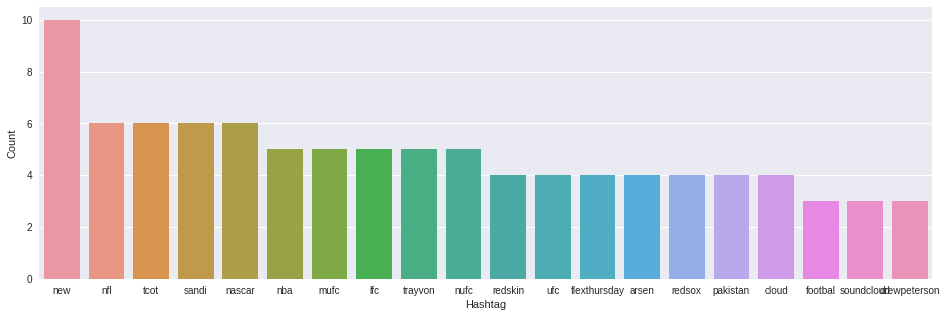

In [27]:
a = nltk.FreqDist(Ht_Normal)
b = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

#Select frequent hashtags
#Here we use 20 hashtags i.e. n=20

b = b.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=b, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

##### Negative tweets

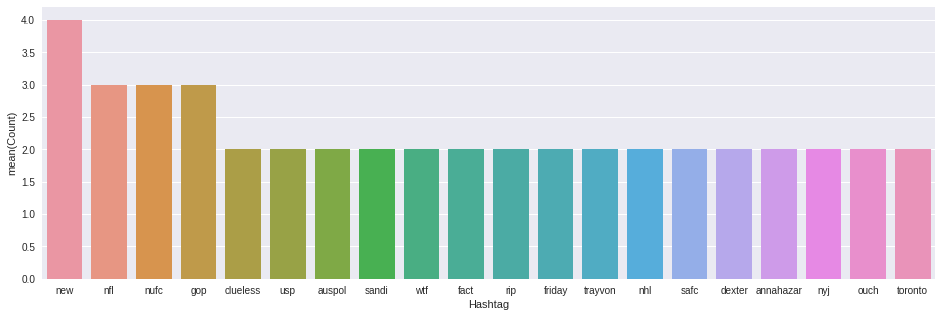

In [28]:
c = nltk.FreqDist(Ht_Negative)
d = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count': list(c.values())})

#Select frequent hashtags
#Here we use 20 hashtags i.e. n=20

d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")

##### Positive tweets

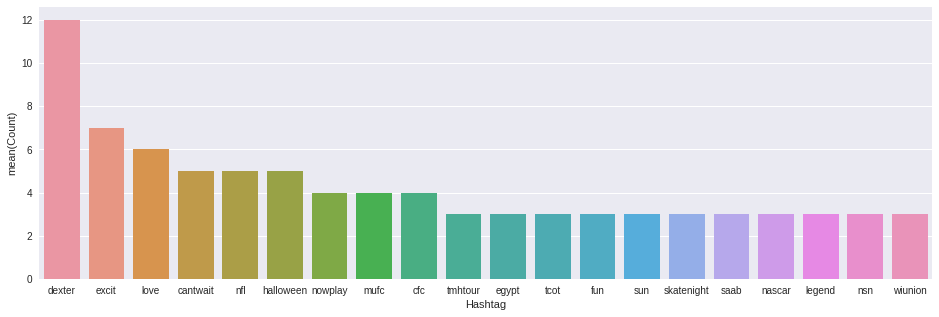

In [29]:
e = nltk.FreqDist(Ht_Positive)
f = pd.DataFrame({'Hashtag': list(e.keys()),
                  'Count': list(e.values())})

#Select frequent hashtags
#Here we use 20 hashtags i.e. n=20

f = f.nlargest(columns="Count", n=20)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=f, x="Hashtag", y="Count")

### Preprocessing is done. Now, We convert our data into features. For this, we use three techniques:

### 1.) Bag-of-Words features

#### Bag-of-words model is a way of extracting features from text for use in machine learning algorithms. This model learns a vocabulary form all of the documents, then models each document by counting the number of times each word appears. For more information, check out [Bag of Words](https:///en.wikipedia.org/wiki/Bag-of-words_model).

#### I have used CountVectorizer which means it works on Term Frequency i.e. counting the occurences of tokens and building a sparse matrix of documents x tokens.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [31]:
BOWvectorize = CountVectorizer(max_df=0.90, min_df=2, max_features = 1000, stop_words='english')
BOW = BOWvectorize.fit_transform(Combine['tweets'])
BOW.shape

(8906, 1000)

### 2.) TF-IDF features

#### TF-IDF stands for Term Frequency - Inverse Document Frequency.
#### In this approach, words are given weight TF-IDF measures relevance, not frequency i.e. wordcounts are replaced with TF-IDF scores across the whole dataset. It is a method for emphasizing words that occur frequently in a given document, while at the same time de-emphasizing words that occur frequently in many documents.

#### *  Term Frequency (TF): It is a scoring of the frequency of the word in the current document. The term frequency is often divided by the document length to normalize.
#### *  Inverse Document Frequency (IDF): It is a scoring of how rare the word is across documents. It is a measure of how rare the term is. Rarer the term, more is the IDF score.

#### For more information,check out [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)


In [32]:
TfidfVect = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
Tfidf = TfidfVect.fit_transform(Combine['tweets'])
Tfidf.shape

(8906, 1000)

### 3.) Word2Vec features
 
#### Word Embeddings: The objective is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus.

### Word2Vec Embedding 
#### It is a combination of two techniques - CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

#### * CBOW - It tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words.
#### * Skip-gram model - It works in reverse manner. It uses the current word to predict the surrounding window of context words. It weighs nearby context words more heavily than more distant context words. 
#### For more information, check out [Word2Vec](https://en.wikipedia.org/wiki/Word2vec)

In [33]:
Tokenize_tweet = Combine['tweets'].apply(lambda x: x.split())

Model_W2V = gensim.models.Word2Vec(Tokenize_tweet, size=200, # No. of features
                                   window=5, 
                                   min_count=2, 
                                   sg=1, # 1 for skip-gram model
                                   hs=0,
                                   negative=10, # for negative sampling
                                   workers=2,  # No. of cores
                                   seed=34 )

Model_W2V.train(Tokenize_tweet, total_examples=len(Combine['tweets']), epochs=20)

(1558960, 1939000)

In [34]:
Model_W2V.wv.most_similar(positive='hope')

[('#thatisal', 0.4771678149700165),
 ('bangladesh', 0.4585626721382141),
 ('xxxx', 0.456315279006958),
 ('metronomi', 0.44176217913627625),
 ('affair', 0.4382452964782715),
 ('cricket', 0.4350263476371765),
 ('taxi', 0.43477511405944824),
 ('acca', 0.4341033399105072),
 ('arrang', 0.4339805245399475),
 ('wiggin', 0.4335517883300781)]

In [35]:
Model_W2V.wv.most_similar(positive="wish")

[('ahhh', 0.6675118207931519),
 ('soup', 0.6617196798324585),
 ('#mmm', 0.6567538976669312),
 ('ahhhh', 0.6425626277923584),
 ('monthsari', 0.6409555673599243),
 ('jaworski', 0.6356217861175537),
 ('gut', 0.6184406280517578),
 ('flash', 0.6131887435913086),
 ('lincoln', 0.612507700920105),
 ('woke', 0.6092439889907837)]

In [36]:
Model_W2V['food']

array([-0.22195165,  0.17405018,  0.09551075, -0.46085203,  0.2745779 ,
       -0.18496394, -0.06947019,  0.06177779, -0.08534474, -0.08830798,
        0.02568301, -0.21262068, -0.09753796, -0.03200483, -0.44719073,
       -0.23076911,  0.12349311, -0.23061901,  0.19529417, -0.18271971,
       -0.02826436,  0.28287128, -0.02808665,  0.13960643, -0.01485454,
       -0.0763538 , -0.12935936,  0.34332332, -0.25293458, -0.27926573,
       -0.11691324, -0.27104512,  0.17887738,  0.18313862,  0.5161142 ,
        0.5116993 , -0.18485495,  0.14496201,  0.3377508 , -0.04716769,
        0.07183732,  0.37922472, -0.15540832,  0.00253995, -0.1419997 ,
        0.25109598,  0.37484628, -0.27963623, -0.16907325, -0.25626513,
        0.16838309,  0.00998463, -0.00868674, -0.33569986,  0.03974688,
        0.26494277, -0.3587431 , -0.21955551,  0.0083986 , -0.37083086,
        0.19604976, -0.17212415,  0.05514466, -0.1329607 ,  0.0197208 ,
       -0.2371268 , -0.17654356,  0.02541859,  0.26975787,  0.02

In [37]:
len(Model_W2V['food'])

200

### Function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [0]:
def word_vec(tokens, size):
  vec = np.zeros(size).reshape((1, size))
  count = 0
  for word in tokens:
    try:
      vec += Model_W2V[word].reshape((1, size))
      count += 1
    except KeyError:
      
      continue
    
  if count != 0:
    vec = vec/count
   
  return vec

In [39]:
Arrays = np.zeros((len(Tokenize_tweet), 200))

for i in range(len(Tokenize_tweet)):
  Arrays[i,:] = word_vec(Tokenize_tweet[i], 200)
  
Arr_df = pd.DataFrame(Arrays)
Arr_df.shape

(8906, 200)

# Model Building

## Evaluation Metric
#### F1 score is used here as an evaluation metric. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

#### The important components of F1 score are:

#### * True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
#### * True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
#### * False Positives (FP) – When actual class is no and predicted class is yes.
#### * False Negatives (FN) – When actual class is yes but predicted class in no.
#### Precision = TP/TP+FP

#### Recall = TP/TP+FN

#### F1 Score = 2(Recall Precision) / (Recall + Precision)

### 1.) Logistic Regression

#### It is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [0]:
#Extract train and test bow features
Train_Bow = BOW[:7589,:]
Test_Bow = BOW[7589:,:]

#Split data into train and validation set
XTrain_Bow, XValid_Bow, YTrain, YValid = train_test_split(Train_Bow, train['label'],
                                                          random_state = 42,
                                                          test_size=0.2)

In [93]:
LR = LogisticRegression(solver='lbfgs', max_iter=500, multi_class='multinomial')
LR.fit(XTrain_Bow, YTrain)

Prediction = LR.predict_proba(XValid_Bow)

# if prediction is greater than or equal to 0.3 than 1 else 0
Pred = Prediction[:,1] >= 0.3
Pred = Pred.astype(np.int)

f1_score(YValid, Pred, average='micro')

0.2134387351778656

In [0]:
Train_Tfidf = Tfidf[:7589,:]
Test_Tfidf = Tfidf[7589:,:]

XTrain_tfidf = Train_Tfidf[YTrain.index]
XValid_tfidf = Train_Tfidf[YValid.index]

In [95]:
LR.fit(XTrain_tfidf, YTrain)

Prediction = LR.predict_proba(XValid_tfidf)

Pred = Prediction[:,1] >= 0.3
Pred = Pred.astype(np.int)

f1_score(YValid, Pred, average='micro')

0.2206851119894598

In [0]:
Train_W2V = Arr_df.iloc[:7589,:]
Test_W2V = Arr_df.iloc[7589:,:]

XTrain_w2v = Train_W2V.iloc[YTrain.index,:]
XValid_w2v = Train_W2V.iloc[YValid.index,:]

In [97]:
LR.fit(XTrain_w2v, YTrain)

Prediction = LR.predict_proba(XValid_w2v)

Pred = Prediction[:,1] >= 0.3
Pred = Pred.astype(np.int)

f1_score(YValid, Pred, average='micro')

0.25823451910408435

### 2.) Support Vector Machine (SVM)

#### It is a supervised machine learning algorithm which can be used for both classification or regression challenges. It is formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [0]:
from sklearn import svm

In [102]:
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(XTrain_Bow, YTrain)

Prediction = svc.predict_proba(XValid_Bow)

Pred = Prediction[:,1] >= 0.3
Pred = Pred.astype(np.int)
f1_score(YValid, Pred, average='micro')

0.24044795783926215

In [104]:
svc.fit(XTrain_tfidf, YTrain)

Prediction = svc.predict_proba(XValid_tfidf)
Pred = Prediction[:,1] >= 0.3
Pred = Pred.astype(np.int)
f1_score(YValid, Pred, average='micro')

0.21673254281949933

In [105]:
svc.fit(XTrain_w2v, YTrain)

Prediction = svc.predict_proba(XValid_w2v)

Pred = Prediction[:,1] >= 0.3
Pred = Pred.astype(np.int)
f1_score(YValid, Pred, average='micro')

0.2621870882740448

### 3.) Random Forest

#### It is a supervised classification algorithm. As the name suggest, this algorithm creates the forest with a number of trees. It is a kind of ensemble learning method, where a few weak models combine to form a powerful model. In Random Forest, we grow multiple trees as opposed to a decision single tree. To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf = RandomForestClassifier(n_estimators=400, random_state=11)

rf.fit(XTrain_Bow, YTrain)

Prediction = rf.predict(XValid_Bow)
f1_score(YValid, Prediction, average='micro')

0.6389986824769434

In [108]:
rf.fit(XTrain_tfidf, YTrain)

Prediction = rf.predict(XValid_tfidf)
f1_score(YValid, Prediction, average='micro')

0.6416337285902504

In [109]:
rf.fit(XTrain_w2v, YTrain)

Prediction = rf.predict(XValid_w2v)
f1_score(YValid, Prediction, average='micro')

0.6054018445322793

### 4.) Extreme Gradient Boosting (XGBoost)

#### Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. It also has additional features for doing cross validation and finding important variables. There are many parameters which need to be controlled to optimize the model.

In [0]:
from xgboost import XGBClassifier

In [111]:
xgbModel = XGBClassifier(Max_depth=6, n_estimators=1000)

xgbModel.fit(XTrain_Bow, YTrain)

Prediction = xgbModel.predict(XValid_Bow)
f1_score(YValid, Prediction, average='micro')


0.6693017127799736

In [112]:
xgbModel.fit(XTrain_tfidf, YTrain)

Prediction = xgbModel.predict(XValid_tfidf)
f1_score(YValid, Prediction, average='micro')


0.6455862977602108

In [113]:
xgbModel = XGBClassifier(Max_depth=6, n_estimators=1000, nthread=3)
xgbModel.fit(XTrain_w2v, YTrain)

Prediction = xgbModel.predict(XValid_w2v)
f1_score(YValid, Prediction, average='micro')


0.6159420289855072